# Importing necessary libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
#To ignore warnings

import warnings
warnings.filterwarnings("ignore")

In [5]:
pd.set_option('display.max_columns' , None)
pd.set_option('display.max_rows' , None)
pd.set_option('display.width' , None)

# Importing Dataset

In [6]:
cars_data = pd.read_csv(r'C:\Desktop\data_analytics\Python\Datasets\cars.csv' , header= None )

# EDA

In [7]:
cars_data.head()

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


Giving column meaningful names

In [8]:
cars_data.columns=['buying','maint','doors','persons','lug_boot','safety','classes']
cars_data.head()

,buying,maint,doors,persons,lug_boot,safety,classes
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [9]:
cars_data.shape

(1728, 7)

In [10]:
cars_data.describe()

,buying,maint,doors,persons,lug_boot,safety,classes
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,med,med,3,more,med,med,unacc
freq,432,432,432,576,576,576,1210


# Missing value check

In [11]:
cars_data.isnull().sum()                                   

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
classes     0
dtype: int64

In [12]:
cars_data.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
classes     object
dtype: object

Creating a copy of existing dataset

In [13]:
cars_df = pd.DataFrame.copy(cars_data)

In [14]:
cars_df.head()

,buying,maint,doors,persons,lug_boot,safety,classes
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


# Converting categorical variable to numerical

In [15]:
colname = cars_df.columns
colname

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'classes'], dtype='object')

In [15]:
cars_df.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
classes     object
dtype: object

In [16]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

for x in colname:
    cars_df[x] = le.fit_transform(cars_df[x])


In [17]:
cars_df.head()

,buying,maint,doors,persons,lug_boot,safety,classes
0,3,3,0,0,2,1,2
1,3,3,0,0,2,2,2
2,3,3,0,0,2,0,2
3,3,3,0,0,1,1,2
4,3,3,0,0,1,2,2


Target variable

acc - 0

good - 1

unacc - 2

vgood - 3

In [18]:
cars_df.dtypes

buying      int32
maint       int32
doors       int32
persons     int32
lug_boot    int32
safety      int32
classes     int32
dtype: object

# Outlier check

<function matplotlib.pyplot.show(*args, **kw)>

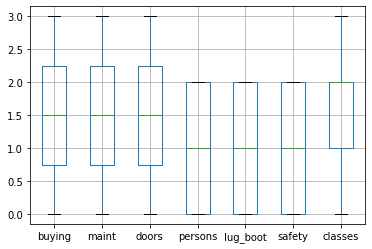

In [19]:
cars_df.boxplot()
plt.show

In [20]:
X = cars_df.values[: , :-1]
Y = cars_df.values[: ,-1]
Y = Y.astype(int)

# Scaling

In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X) #will llearn about X

X = scaler.transform(X) # will transform
print(X)
#fit_transform available 

[[ 1.34164079  1.34164079 -1.34164079 -1.22474487  1.22474487  0.        ]
 [ 1.34164079  1.34164079 -1.34164079 -1.22474487  1.22474487  1.22474487]
 [ 1.34164079  1.34164079 -1.34164079 -1.22474487  1.22474487 -1.22474487]
 ...
 [-0.4472136  -0.4472136   1.34164079  1.22474487 -1.22474487  0.        ]
 [-0.4472136  -0.4472136   1.34164079  1.22474487 -1.22474487  1.22474487]
 [-0.4472136  -0.4472136   1.34164079  1.22474487 -1.22474487 -1.22474487]]


# Train test split

In [22]:
from sklearn.model_selection import train_test_split

#Split the data into test and train

X_train ,X_test, Y_train, Y_test = train_test_split(X, Y , test_size =0.3 , random_state =10)



# Model building and prediction

In [25]:
from sklearn.tree import DecisionTreeClassifier
#create a model object

#classifier = DecisionTreeClassifier(random_state = 10)
classifier = DecisionTreeClassifier(random_state = 10 , min_samples_leaf=5 ,max_depth=10 )
#train the model object
classifier.fit(X_train, Y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=10, splitter='best')

In [26]:
Y_pred = classifier.predict(X_test)
print(Y_pred)

[2 2 2 2 1 2 0 0 2 0 2 2 2 2 0 0 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 0 2 2 2
 2 2 0 2 2 2 1 2 0 2 2 2 2 2 0 1 3 1 2 0 2 0 2 2 2 2 0 2 2 1 0 2 2 3 2 2 2
 1 2 0 0 2 2 2 2 2 2 2 2 2 0 2 0 2 2 2 0 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2
 2 2 2 1 2 2 1 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 0 2 2 3 2 2 0 2 0 3 2 2 2 2
 2 2 2 2 3 0 2 2 2 2 1 1 2 0 2 2 2 2 2 2 2 2 2 1 0 3 2 2 2 2 0 0 2 2 2 2 3
 2 0 2 1 0 2 2 2 2 0 3 0 0 2 2 2 2 0 2 0 2 2 0 2 2 1 0 0 2 2 0 2 2 1 2 2 2
 2 2 2 2 0 2 2 2 2 2 0 0 2 2 2 2 3 2 2 0 2 0 2 0 2 2 2 2 2 0 2 2 2 0 2 2 0
 2 2 2 0 2 2 2 0 2 2 0 2 2 2 1 1 2 2 2 0 2 2 0 3 3 0 0 0 2 2 2 3 2 2 0 2 2
 2 2 2 0 2 2 2 1 2 2 2 0 2 2 2 2 0 0 2 2 1 2 2 2 0 2 2 0 0 2 0 0 2 2 2 0 2
 2 2 2 2 0 2 2 2 0 2 2 2 2 2 2 2 2 1 1 3 2 2 2 2 0 2 2 2 3 2 2 2 2 1 2 2 2
 0 0 2 2 2 2 2 2 2 0 2 0 1 2 2 2 2 2 0 2 2 3 2 0 0 0 2 1 2 2 2 0 1 2 0 2 3
 0 2 2 0 2 2 2 0 1 2 0 0 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 2 2 2 2 0 2 2
 2 0 2 2 2 0 2 2 2 0 2 2 0 1 2 2 2 2 3 2 2 2 2 2 2 0 2 0 2 0 2 2 2 2 0 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 

# Accuracy

In [27]:
from sklearn.metrics import confusion_matrix , accuracy_score , classification_report

cfm = confusion_matrix(Y_test , Y_pred)
print(cfm)
print("Classification report :")

print(classification_report(Y_test , Y_pred))

acc = accuracy_score(Y_test , Y_pred)
print("Accuracy of the model:" , acc)


[[ 92   6   4   0]
 [  0  17   2   2]
 [  8   0 363   0]
 [  3   5   0  17]]
Classification report :
              precision    recall  f1-score   support

           0       0.89      0.90      0.90       102
           1       0.61      0.81      0.69        21
           2       0.98      0.98      0.98       371
           3       0.89      0.68      0.77        25

    accuracy                           0.94       519
   macro avg       0.84      0.84      0.84       519
weighted avg       0.95      0.94      0.94       519

Accuracy of the model: 0.9421965317919075


In [28]:
print(list(zip(colname , classifier.feature_importances_)))


[('buying', 0.15391565199335028), ('maint', 0.2699990515342031), ('doors', 0.03511651586061642), ('persons', 0.18449221442490638), ('lug_boot', 0.08402440114201538), ('safety', 0.2724521650449083)]


Above code can be used to determine the importance of variables

It becomes useful when we have more number of variables

# Visualization

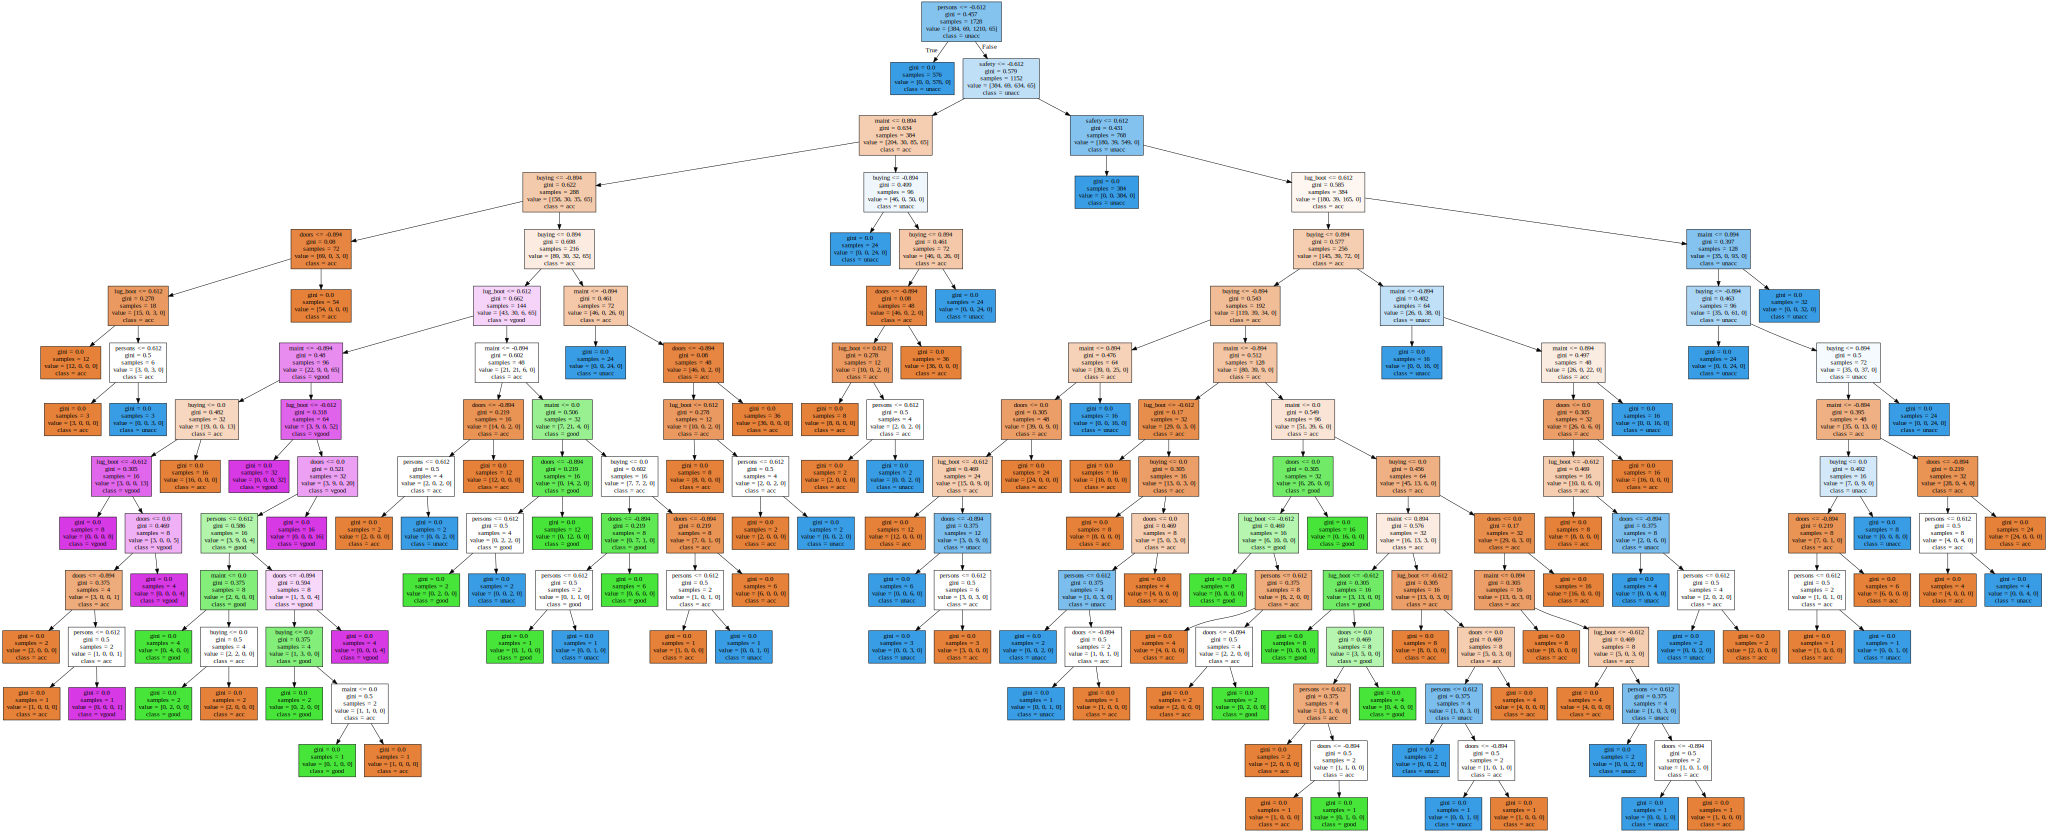

In [32]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from sklearn.datasets import load_wine
from IPython.display import SVG
from graphviz import Source
from IPython.display import display                               
from ipywidgets import interactive
# load dataset
data = cars_df
labels = cars_df.columns[:-1]
estimator = DecisionTreeClassifier()
estimator.fit(X, Y)

graph = Source(tree.export_graphviz(estimator, out_file=None
   , feature_names=labels
    , class_names=['acc', 'good', 'unacc' , 'vgood'] 
   , filled = True))
display(SVG(graph.pipe(format='svg')))

Visualization in jupyter is a bit difficult when there are complex trees

Thus we can use webgraphviz website to visualize complex trees

we need to create a text file using below code and upload the code in webgraphviz.com to plot the decision tree

In [33]:
from sklearn import tree
with open("model_DecisionTree.txt", "w") as f:

    f = tree.export_graphviz(classifier, feature_names=colname[:-1],
        out_file=f)

#generate the text file

# Bagging Classifier

In [34]:
#Bagging Classifier 

from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier(50 , random_state= 10)

model = model.fit(X_train , Y_train)

Y_pred = model.predict(X_test)



# Accuracy

In [35]:
from sklearn.metrics import confusion_matrix , accuracy_score , classification_report

cfm = confusion_matrix(Y_test , Y_pred)
print(cfm)
print("Classification report :")

print(classification_report(Y_test , Y_pred))

acc = accuracy_score(Y_test , Y_pred)
print("Accuracy of the model:" , acc)


[[100   0   2   0]
 [  3  18   0   0]
 [  3   0 368   0]
 [  1   2   0  22]]
Classification report :
              precision    recall  f1-score   support

           0       0.93      0.98      0.96       102
           1       0.90      0.86      0.88        21
           2       0.99      0.99      0.99       371
           3       1.00      0.88      0.94        25

    accuracy                           0.98       519
   macro avg       0.96      0.93      0.94       519
weighted avg       0.98      0.98      0.98       519

Accuracy of the model: 0.9788053949903661


# Random forest

In [36]:

from sklearn.ensemble import RandomForestClassifier

model_Random = RandomForestClassifier(210 , random_state= 10)

model_Random = model_Random.fit(X_train , Y_train)

Y_pred = model_Random.predict(X_test)

# Accuracy

In [37]:
from sklearn.metrics import confusion_matrix , accuracy_score , classification_report

cfm = confusion_matrix(Y_test , Y_pred)
print(cfm)
print("Classification report :")

print(classification_report(Y_test , Y_pred))

acc = accuracy_score(Y_test , Y_pred)
print("Accuracy of the model:" , acc)


[[ 99   3   0   0]
 [  1  19   0   1]
 [  2   0 369   0]
 [  2   0   0  23]]
Classification report :
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       102
           1       0.86      0.90      0.88        21
           2       1.00      0.99      1.00       371
           3       0.96      0.92      0.94        25

    accuracy                           0.98       519
   macro avg       0.94      0.95      0.95       519
weighted avg       0.98      0.98      0.98       519

Accuracy of the model: 0.9826589595375722


# Ada Boosting

In [38]:
#boosting - Ada boost - generic boosting algo, less used for DT. can be used for other algo

from sklearn.ensemble import AdaBoostClassifier

model_Ada = AdaBoostClassifier(base_estimator=DecisionTreeClassifier() ,n_estimators=50, random_state= 10)

model_Ada = model_Ada.fit(X_train , Y_train)

Y_pred = model_Ada.predict(X_test)


# Accuracy

In [39]:
from sklearn.metrics import confusion_matrix , accuracy_score , classification_report

cfm = confusion_matrix(Y_test , Y_pred)
print(cfm)
print("Classification report :")

print(classification_report(Y_test , Y_pred))

acc = accuracy_score(Y_test , Y_pred)
print("Accuracy of the model:" , acc)


[[ 99   2   1   0]
 [  4  17   0   0]
 [  0   0 371   0]
 [  1   0   0  24]]
Classification report :
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       102
           1       0.89      0.81      0.85        21
           2       1.00      1.00      1.00       371
           3       1.00      0.96      0.98        25

    accuracy                           0.98       519
   macro avg       0.96      0.94      0.95       519
weighted avg       0.98      0.98      0.98       519

Accuracy of the model: 0.9845857418111753


# Gradient boost

In [40]:
#boosting - Gradient boost - widely used

from sklearn.ensemble import GradientBoostingClassifier

model_Grad = GradientBoostingClassifier(n_estimators=100, random_state= 10)

model_Grad = model_Grad.fit(X_train , Y_train)

Y_pred = model_Grad.predict(X_test)

# Accuracy

In [41]:
from sklearn.metrics import confusion_matrix , accuracy_score , classification_report

cfm = confusion_matrix(Y_test , Y_pred)
print(cfm)
print("Classification report :")

print(classification_report(Y_test , Y_pred))

acc = accuracy_score(Y_test , Y_pred)
print("Accuracy of the model:" , acc)


[[101   1   0   0]
 [  0  19   0   2]
 [  0   1 370   0]
 [  0   0   0  25]]
Classification report :
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       102
           1       0.90      0.90      0.90        21
           2       1.00      1.00      1.00       371
           3       0.93      1.00      0.96        25

    accuracy                           0.99       519
   macro avg       0.96      0.97      0.97       519
weighted avg       0.99      0.99      0.99       519

Accuracy of the model: 0.9922928709055877


# XG boost

In [43]:
from xgboost import XGBClassifier
#need to install package from anaconda prompt - command - "pip install xgboost"
#xgboost more supported when we large number of observation

model_Grad = XGBClassifier( random_state= 10)

model_Grad = model_Grad.fit(X_train , Y_train)

Y_pred = model_Grad.predict(X_test)

# Accuracy

In [44]:
from sklearn.metrics import confusion_matrix , accuracy_score , classification_report

cfm = confusion_matrix(Y_test , Y_pred)
print(cfm)
print("Classification report :")

print(classification_report(Y_test , Y_pred))

acc = accuracy_score(Y_test , Y_pred)
print("Accuracy of the model:" , acc)


[[101   1   0   0]
 [  0  21   0   0]
 [  0   0 371   0]
 [  0   0   0  25]]
Classification report :
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       102
           1       0.95      1.00      0.98        21
           2       1.00      1.00      1.00       371
           3       1.00      1.00      1.00        25

    accuracy                           1.00       519
   macro avg       0.99      1.00      0.99       519
weighted avg       1.00      1.00      1.00       519

Accuracy of the model: 0.9980732177263969


# Ensemble model

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier

 


In [49]:
# create the sub models
estimators = []
model1 = LogisticRegression()
estimators.append(('log', model1))
model2 = DecisionTreeClassifier(criterion='gini',random_state=10)
estimators.append(('cart', model2))
model3 = SVC(kernel="rbf", C=70,gamma=0.1)
estimators.append(('svm', model3))
model4 = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
estimators.append(('knn', model4))


In [50]:
# create the ensemble model
ensemble = VotingClassifier(estimators)
ensemble.fit(X_train,Y_train)
Y_pred=ensemble.predict(X_test)
#print(Y_pred)

# Accuracy

In [51]:
from sklearn.metrics import confusion_matrix , accuracy_score , classification_report

cfm = confusion_matrix(Y_test , Y_pred)
print(cfm)
print("Classification report :")

print(classification_report(Y_test , Y_pred))

acc = accuracy_score(Y_test , Y_pred)
print("Accuracy of the model:" , acc)


[[101   0   1   0]
 [  4  17   0   0]
 [  0   0 371   0]
 [  2   0   0  23]]
Classification report :
              precision    recall  f1-score   support

           0       0.94      0.99      0.97       102
           1       1.00      0.81      0.89        21
           2       1.00      1.00      1.00       371
           3       1.00      0.92      0.96        25

    accuracy                           0.99       519
   macro avg       0.99      0.93      0.95       519
weighted avg       0.99      0.99      0.99       519

Accuracy of the model: 0.9865125240847784
